In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sqlite3
from os.path import isdir, join

from aequilibrae import Project

from functions.rai.basic_rai_computation import basic_RAI_data
from functions.rai.plot_rai import plot_rai
from functions.rai.rural_areas import select_rural_areas
from functions.rai.plot_rural_areas import plot_rural_areas

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/envs/saturn/share/proj failed


In [3]:
model_place = "Andorra"

In [4]:
folder = f'../../{model_place}'

if isdir(folder):
    print(folder)

../../Andorra


In [5]:
project = Project()
project.open(folder)

### Find rural areas in Armenia

In [6]:
rural_areas = select_rural_areas(project)

/srv/conda/envs/saturn/lib/python3.9/site-packages/pandas/core/frame.py:684: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  data = list(data)
/srv/conda/envs/saturn/lib/python3.9/site-packages/pandas/core/frame.py:684: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  data = list(data)


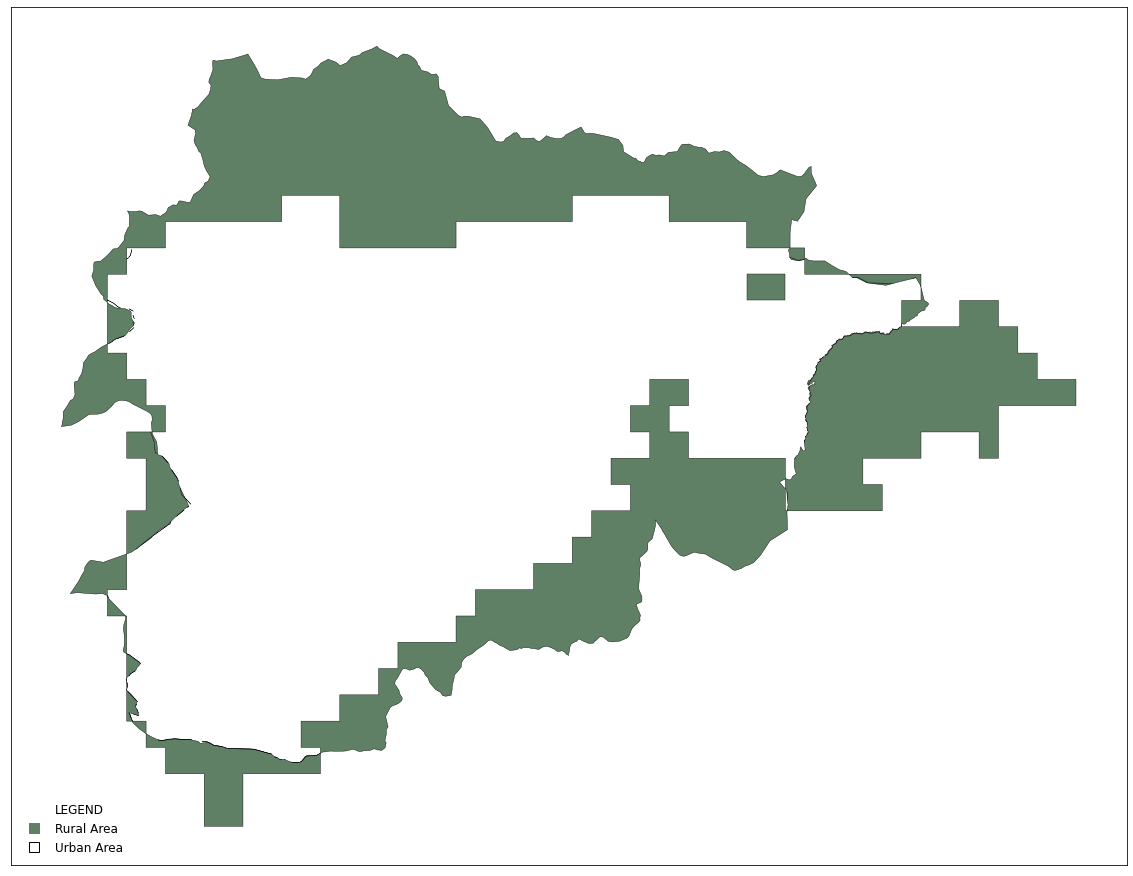

In [7]:
plot_rural_areas(rural_areas)

### Computes distance from the closest links for all population pixels
* Resolution is the same as WorldPop

In [8]:
%%time
rai_data = basic_RAI_data(project, model_place)

Obtaining population data


/srv/conda/envs/saturn/lib/python3.9/site-packages/pandas/core/frame.py:684: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  data = list(data)
/srv/conda/envs/saturn/lib/python3.9/site-packages/pandas/core/frame.py:684: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  data = list(data)


Obtaining network data
Computing population distance to network
Obtaining country subdivisions
Obtaining model zones
CPU times: user 28.1 s, sys: 351 ms, total: 28.4 s
Wall time: 29.8 s


In [9]:
rai_data.head()

,population,geom,accessible,inaccessible,division_name,level,zone_id
16,0.073953,POINT (1.55000 42.65167),0.0,0.073953,Ordino,1,3
20,0.068369,POINT (1.55333 42.65167),0.0,0.068369,Ordino,1,3
23,0.067131,POINT (1.55583 42.65167),0.0,0.067131,Ordino,1,3
44,0.074612,POINT (1.54750 42.65083),0.0,0.074612,Ordino,1,3
45,0.076522,POINT (1.54833 42.65083),0.0,0.076522,Ordino,1,3


In [10]:
rai_data.accessible.sum()/(rai_data.inaccessible.sum() + rai_data.accessible.sum())

0.5584829353919462

In [11]:
rai_data.accessible.sum()

1370.348707318306

### Plot RAI per subdivision

Obtaining country subdivisions


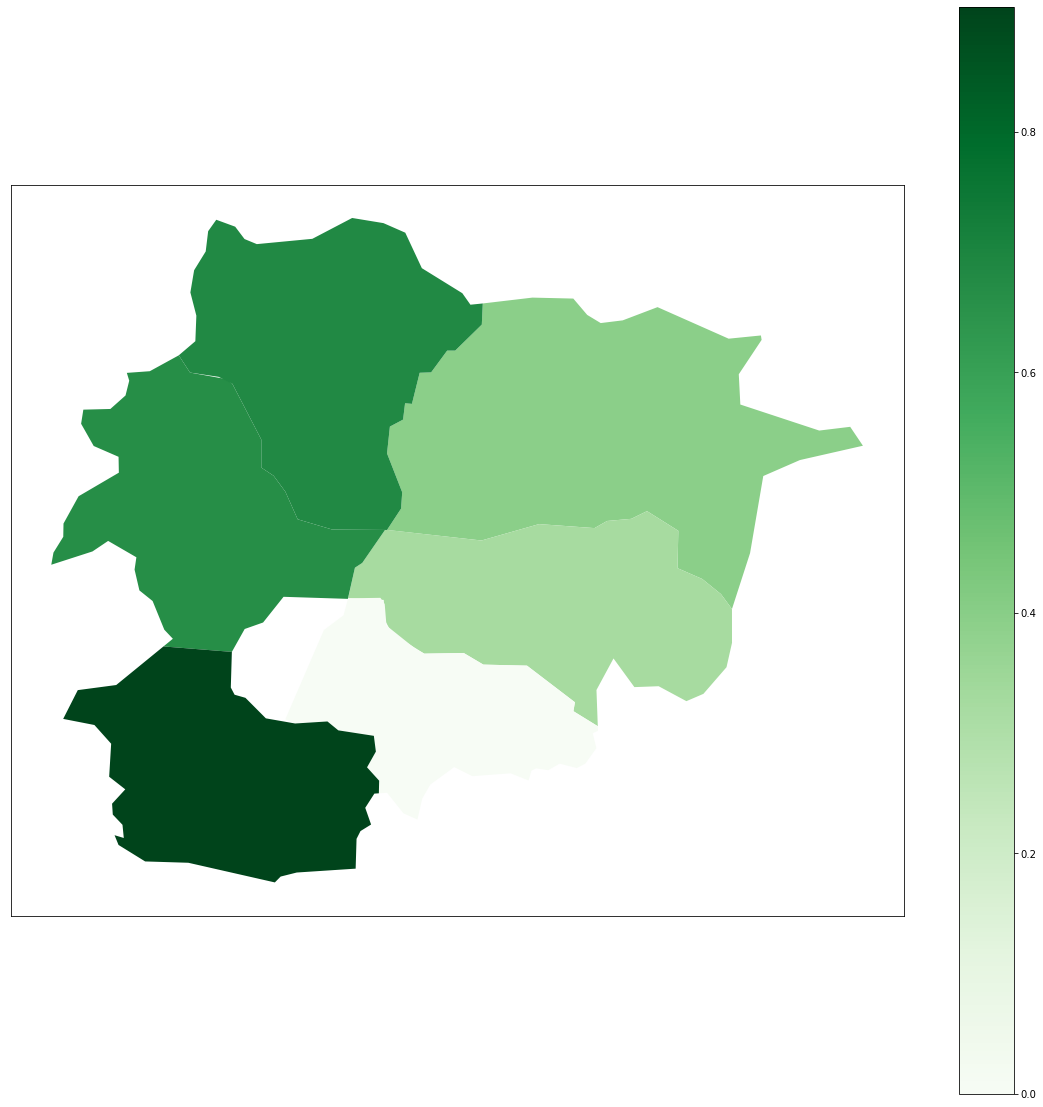

In [12]:
plot_rai(rai_data, project, division_type='subdivision')

### Plot RAI per zone

Obtaining model zones


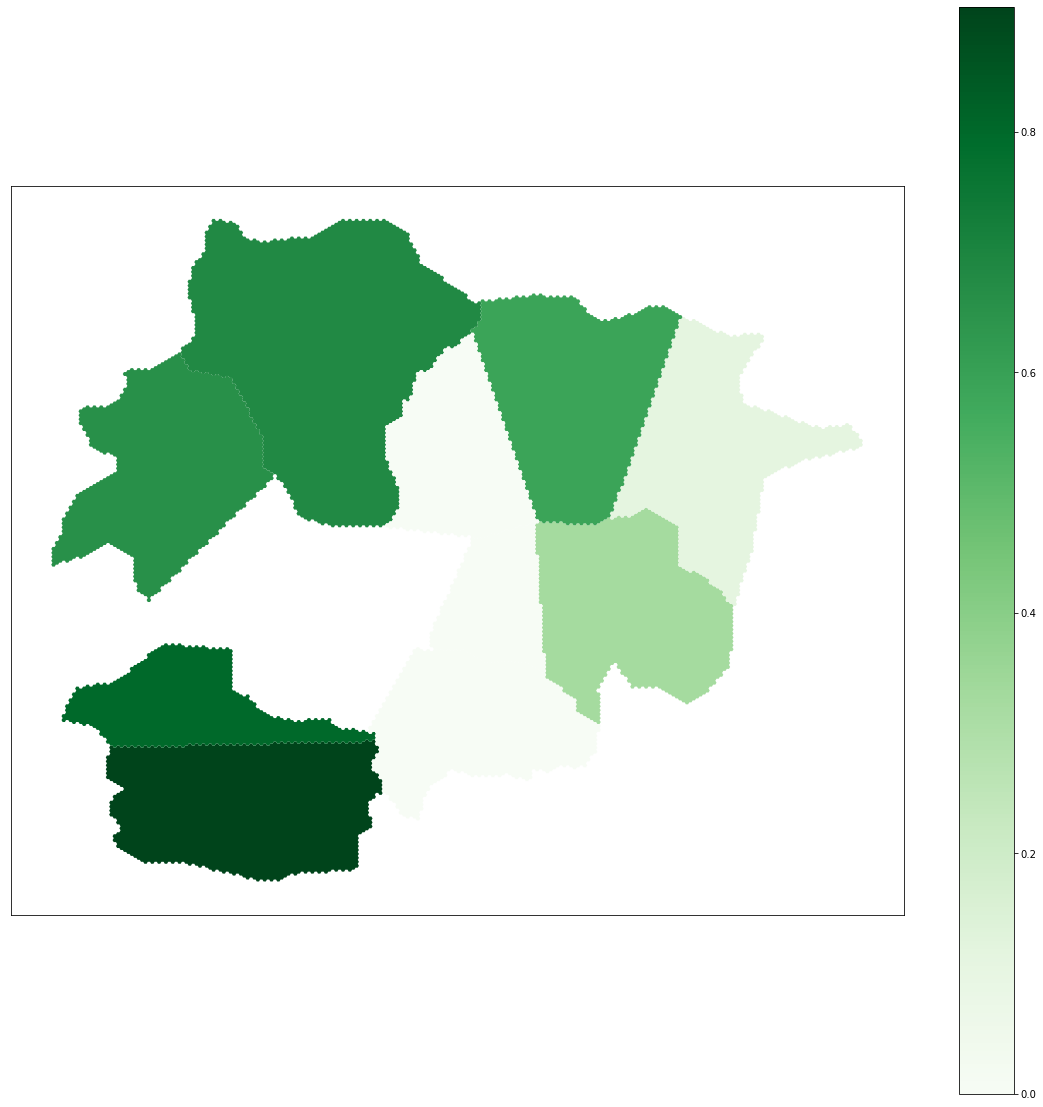

In [13]:
plot_rai(rai_data, project, division_type='zone')